# Problem Solving Agents: Uninformed Search

## Problem-Solving Agents & State Space

When the correct action to take is not immediately obvious, an agent may need to to plan ahead: to consider a sequence of actions that form a path to a goal state.

Such an agent is called a **problem-solving agent**, and the computational process it undertakes is called **search**.

Problem-solving agents use atomic representations - states of the world are considered as wholes, with no internal structure visible to the problem-solving algorithms

We are going to build the **goal-based agents** that can plan ahead to solve problems.


       

### Romania navigation problem Example

In particular, we examine n*avigation problem/ route finding problem*.

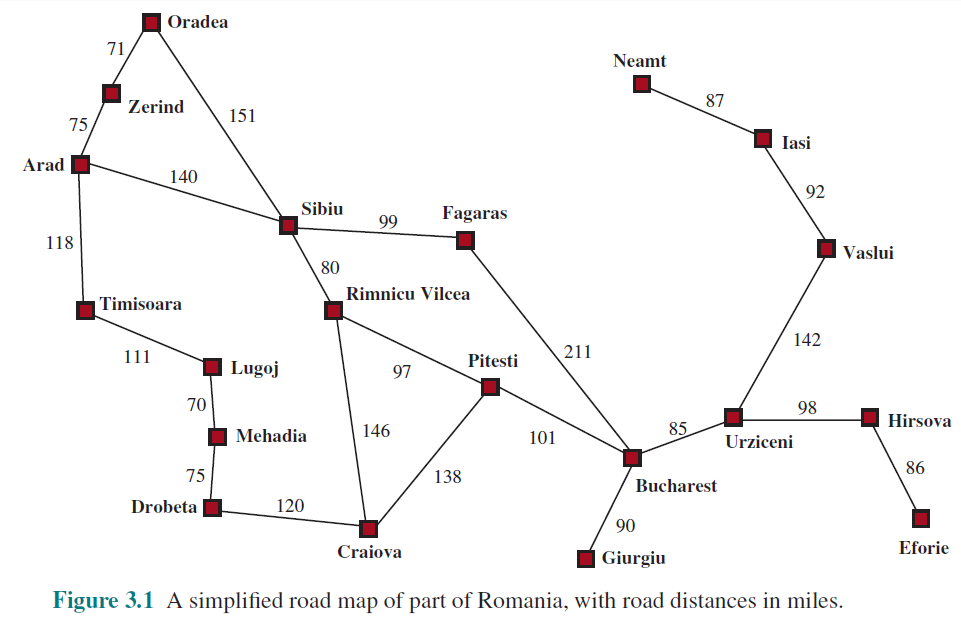

We consider only the simplest environments: single agent, fully observable, deterministic, static, discrete, and known

1. We must begin by **precisely defining problems** -> `class Problem` - how we define a Problem in general 

 **!!!** Explore the `class Problem`

2. `class Problem` == The *abstract class* for a formal problem. 
* You should subclass     this and implement the methods `actions` and `result`, and possibly  ` __init__, goal_test`, and `path_cost`. 
* The *state space* should be included in a subclass
* Then you will create instances of your subclass and solve them with the various search functions.

3. `class  GraphProblem(Problem)` == The problem of searching a graph (the state space  ==  a graph) from one node to another
* The state space is stored as nested dictionaries

    `G={'node1':{'neighbor1_of_Node1':distance_from_Node1_to_neighbor1_of_Node1,..},
       .....}`

In [1]:
from src.graphProblemClass import GraphProblem

The graph data -> stored in the nested dictionary `romaniaData`

In [2]:
from data.RomaniaMapData import romaniaData

In [6]:
romaniaData

{'Arad': {'Zerind': 75, 'Sibiu': 140, 'Timisoara': 118},
 'Bucharest': {'Urziceni': 85, 'Pitesti': 101, 'Giurgiu': 90, 'Fagaras': 211},
 'Craiova': {'Drobeta': 120, 'Rimnicu': 146, 'Pitesti': 138},
 'Drobeta': {'Mehadia': 75},
 'Eforie': {'Hirsova': 86},
 'Fagaras': {'Sibiu': 99},
 'Hirsova': {'Urziceni': 98},
 'Iasi': {'Vaslui': 92, 'Neamt': 87},
 'Lugoj': {'Timisoara': 111, 'Mehadia': 70},
 'Oradea': {'Zerind': 71, 'Sibiu': 151},
 'Pitesti': {'Rimnicu': 97},
 'Rimnicu': {'Sibiu': 80},
 'Urziceni': {'Vaslui': 142}}

4. Based on this dictionary we need to build a graph
* !!! Check the `Graph class`

A graph connects nodes (vertices) by edges (links). Each edge can also have a length associated with it. 

* The constructor call is something like:

        `g = Graph({'A': {'B': 1, 'C': 2})`

this makes a graph with 3 nodes, A, B, and C, with an edge of length 1 from     A to B,  and an edge of length 2 from A to C. 
    
This makes an `undirected graph`, so inverse links are also added. 

If you add more links with `g.connect('B', 'C', 3)`, then inverse link is also added. 
* You can use `g.nodes()` to get a list of nodes,
* `g.get('A')` to get a dict of links out of A, 
* and `g.get('A', 'B')` to get the length of the link from A to B.

In [3]:
from src.graphClass import Graph

In [4]:
romaniaGraph = Graph(romaniaData)

In [5]:
romaniaGraph.nodes()

['Eforie',
 'Arad',
 'Drobeta',
 'Pitesti',
 'Bucharest',
 'Craiova',
 'Iasi',
 'Rimnicu',
 'Mehadia',
 'Sibiu',
 'Hirsova',
 'Zerind',
 'Timisoara',
 'Lugoj',
 'Giurgiu',
 'Fagaras',
 'Oradea',
 'Urziceni',
 'Neamt',
 'Vaslui']

In [6]:
romaniaGraph.get('Arad')

{'Zerind': 75, 'Sibiu': 140, 'Timisoara': 118}

In [7]:
romaniaGraph.get('Arad','Zerind')

75

Let's try to show the graph

In [8]:
from pyvis.network import Network 

In [9]:
net = Network( heading="Lab3. Examples of Romania Navigation Problem",
                bgcolor ="#242020",
                font_color = "white",
                height = "750px",
                width = "100%"
) # do this

In [10]:
net.add_nodes(romaniaGraph.nodes(), title=[str(node) for node in romaniaGraph.nodes()])

In [11]:
nodeColors={
    "start":"red",
    "goal": "green",
    "frontier": "orange",
    "expanded":"pink"
}

In [12]:
for node in net.nodes:
    if node['id']=='Arad':
        node["color"]=nodeColors["start"]
    elif node['id']=='Bucharest':
        node["color"]=nodeColors["goal"]
    

In [13]:
romaniaGraph.graph_dict

{'Arad': {'Zerind': 75, 'Sibiu': 140, 'Timisoara': 118},
 'Bucharest': {'Urziceni': 85, 'Pitesti': 101, 'Giurgiu': 90, 'Fagaras': 211},
 'Craiova': {'Drobeta': 120, 'Rimnicu': 146, 'Pitesti': 138},
 'Drobeta': {'Mehadia': 75, 'Craiova': 120},
 'Eforie': {'Hirsova': 86},
 'Fagaras': {'Sibiu': 99, 'Bucharest': 211},
 'Hirsova': {'Urziceni': 98, 'Eforie': 86},
 'Iasi': {'Vaslui': 92, 'Neamt': 87},
 'Lugoj': {'Timisoara': 111, 'Mehadia': 70},
 'Oradea': {'Zerind': 71, 'Sibiu': 151},
 'Pitesti': {'Rimnicu': 97, 'Bucharest': 101, 'Craiova': 138},
 'Rimnicu': {'Sibiu': 80, 'Craiova': 146, 'Pitesti': 97},
 'Urziceni': {'Vaslui': 142, 'Bucharest': 85, 'Hirsova': 98},
 'Zerind': {'Arad': 75, 'Oradea': 71},
 'Sibiu': {'Arad': 140, 'Fagaras': 99, 'Oradea': 151, 'Rimnicu': 80},
 'Timisoara': {'Arad': 118, 'Lugoj': 111},
 'Giurgiu': {'Bucharest': 90},
 'Mehadia': {'Drobeta': 75, 'Lugoj': 70},
 'Vaslui': {'Iasi': 92, 'Urziceni': 142},
 'Neamt': {'Iasi': 87}}

In [14]:
edges=[]
edges_labels=[]

for node_source in romaniaGraph.nodes():
    for node_target, dist in romaniaGraph.get(node_source).items():
        if set((node_source,node_target)) not in edges:
            net.add_edge(node_source,node_target, label=str(dist))
            edges.append(set((node_source,node_target)))
            edges_labels.append(str(dist))
            
    
    

In [15]:
edges_labels[:5]

['86', '75', '140', '118', '75']

In [19]:
edges[:5]

[{'Drobeta', 'Mehadia'},
 {'Craiova', 'Drobeta'},
 {'Arad', 'Zerind'},
 {'Arad', 'Sibiu'},
 {'Arad', 'Timisoara'}]

In [20]:
net.edges

[{'label': '75', 'from': 'Drobeta', 'to': 'Mehadia'},
 {'label': '120', 'from': 'Drobeta', 'to': 'Craiova'},
 {'label': '75', 'from': 'Arad', 'to': 'Zerind'},
 {'label': '140', 'from': 'Arad', 'to': 'Sibiu'},
 {'label': '118', 'from': 'Arad', 'to': 'Timisoara'},
 {'label': '97', 'from': 'Pitesti', 'to': 'Rimnicu'},
 {'label': '101', 'from': 'Pitesti', 'to': 'Bucharest'},
 {'label': '138', 'from': 'Pitesti', 'to': 'Craiova'},
 {'label': '99', 'from': 'Sibiu', 'to': 'Fagaras'},
 {'label': '151', 'from': 'Sibiu', 'to': 'Oradea'},
 {'label': '80', 'from': 'Sibiu', 'to': 'Rimnicu'},
 {'label': '92', 'from': 'Iasi', 'to': 'Vaslui'},
 {'label': '87', 'from': 'Iasi', 'to': 'Neamt'},
 {'label': '85', 'from': 'Bucharest', 'to': 'Urziceni'},
 {'label': '90', 'from': 'Bucharest', 'to': 'Giurgiu'},
 {'label': '211', 'from': 'Bucharest', 'to': 'Fagaras'},
 {'label': '86', 'from': 'Eforie', 'to': 'Hirsova'},
 {'label': '146', 'from': 'Rimnicu', 'to': 'Craiova'},
 {'label': '70', 'from': 'Mehadia', 't

In [16]:
net.show("graph1.html", notebook=False)

graph1.html


### The vacumm world example

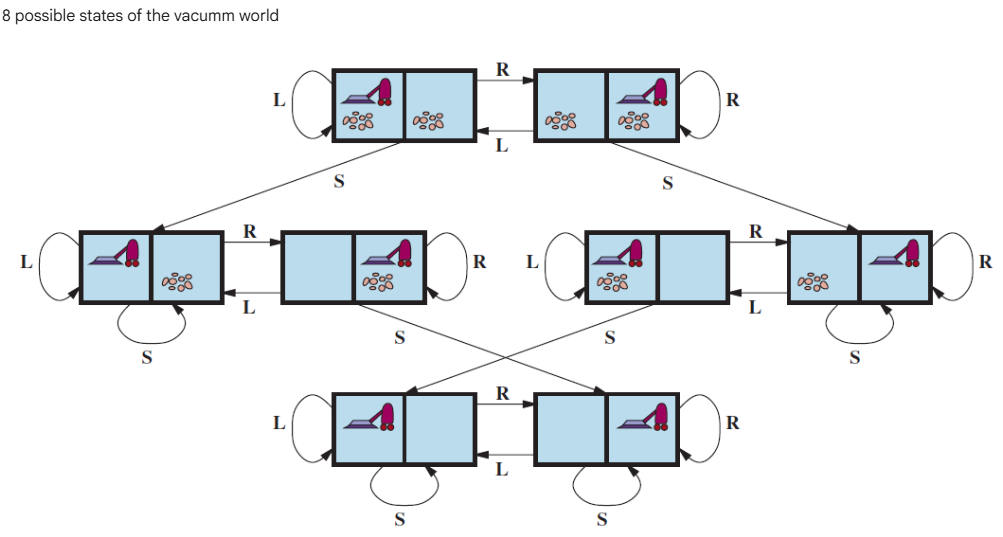

Each state is represented as:

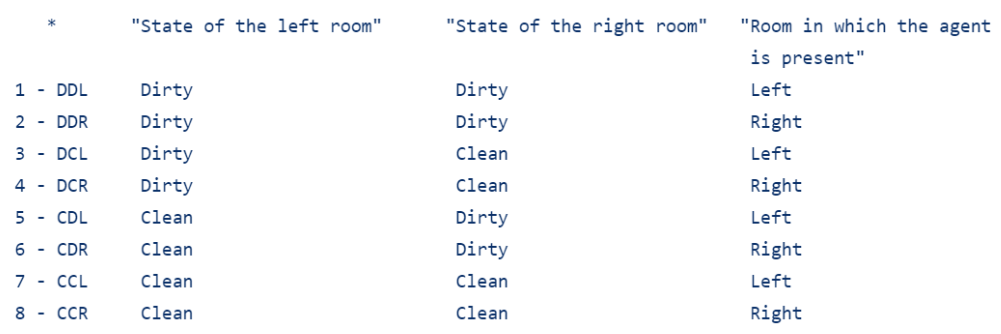

In [18]:
from data.vacuumWorldData import vacuumWorld

In [19]:
vacuumWorld # the state space description

{'DDL': {'Suck': 'CDL', 'Left': 'DDL', 'Right': 'DDR'},
 'DDR': {'Suck': 'DCR', 'Left': 'DDL', 'Right': 'DDR'},
 'DCL': {'Suck': 'CCL', 'Left': 'DCL', 'Right': 'DCR'},
 'DCR': {'Suck': 'DCR', 'Left': 'DCL', 'Right': 'DCR'},
 'CDL': {'Suck': 'CDL', 'Left': 'CDL', 'Right': 'CDR'},
 'CDR': {'Suck': 'CCR', 'Left': 'CDL', 'Right': 'CDR'},
 'CCL': {'Suck': 'CCL', 'Left': 'CCL', 'Right': 'CCR'},
 'CCR': {'Suck': 'CCR', 'Left': 'CCL', 'Right': 'CCR'}}

In [20]:
from src.vacuumGraphClass import vacuumGraph

In [21]:
from data.vacuumWorldData import vacuumStatesLocations

In [22]:
vacuumWorldGraph = vacuumGraph(vacuumWorld, vacuumStatesLocations())

In [23]:
vacuumWorldGraph.graph_dict

{'DDL': {'CDL': 1, 'DDL': 1, 'DDR': 1},
 'DDR': {'DCR': 1, 'DDL': 1, 'DDR': 1},
 'DCL': {'CCL': 1, 'DCL': 1, 'DCR': 1},
 'DCR': {'DCR': 1, 'DCL': 1},
 'CDL': {'CDL': 1, 'CDR': 1},
 'CDR': {'CCR': 1, 'CDL': 1, 'CDR': 1},
 'CCL': {'CCL': 1, 'CCR': 1},
 'CCR': {'CCR': 1, 'CCL': 1}}

In [24]:
vacuumWorldGraph.origin

{'DDL': {'Suck': 'CDL', 'Left': 'DDL', 'Right': 'DDR'},
 'DDR': {'Suck': 'DCR', 'Left': 'DDL', 'Right': 'DDR'},
 'DCL': {'Suck': 'CCL', 'Left': 'DCL', 'Right': 'DCR'},
 'DCR': {'Suck': 'DCR', 'Left': 'DCL', 'Right': 'DCR'},
 'CDL': {'Suck': 'CDL', 'Left': 'CDL', 'Right': 'CDR'},
 'CDR': {'Suck': 'CCR', 'Left': 'CDL', 'Right': 'CDR'},
 'CCL': {'Suck': 'CCL', 'Left': 'CCL', 'Right': 'CCR'},
 'CCR': {'Suck': 'CCR', 'Left': 'CCL', 'Right': 'CCR'}}

In [25]:
vacuumWorldGraph.get(("CDR"))

{'CCR': 1, 'CDL': 1, 'CDR': 1}

In [26]:
vacuumWorldGraph.getLocation(("CDR"))

(108, 103)

In [27]:
net_VacuumWorld = Network( heading="Lab3. Examples of Vacuum World Problem",
                bgcolor ="#242020",
                font_color = "white",
                height = "750px",
                width = "100%",
                directed = True, 
) # do this

In [28]:
vacuumWorldGraph.nodes()

['CDR', 'DCR', 'DDL', 'CCR', 'DDR', 'DCL', 'CCL', 'CDL']

In [29]:
#net_VacuumWorld.add_nodes(vacuumWorldGraph.nodes())

for node in vacuumWorldGraph.nodes():
    x,y=vacuumWorldGraph.getLocation(node)
    #net_VacuumWorld.add_node(node, x=x, y=y, physics=False)
    net_VacuumWorld.add_node(node, x=x, y=y)

In [30]:
vacuumWorldGraph.get(("CDR"))

{'CCR': 1, 'CDL': 1, 'CDR': 1}

In [31]:
vacuumWorld

{'DDL': {'Suck': 'CDL', 'Left': 'DDL', 'Right': 'DDR'},
 'DDR': {'Suck': 'DCR', 'Left': 'DDL', 'Right': 'DDR'},
 'DCL': {'Suck': 'CCL', 'Left': 'DCL', 'Right': 'DCR'},
 'DCR': {'Suck': 'DCR', 'Left': 'DCL', 'Right': 'DCR'},
 'CDL': {'Suck': 'CDL', 'Left': 'CDL', 'Right': 'CDR'},
 'CDR': {'Suck': 'CCR', 'Left': 'CDL', 'Right': 'CDR'},
 'CCL': {'Suck': 'CCL', 'Left': 'CCL', 'Right': 'CCR'},
 'CCR': {'Suck': 'CCR', 'Left': 'CCL', 'Right': 'CCR'}}

In [32]:
edge_weights = {(k, v2) : k2 for k, v in vacuumWorld.items() for k2, v2 in v.items()}#actions
edge_weights

{('DDL', 'CDL'): 'Suck',
 ('DDL', 'DDL'): 'Left',
 ('DDL', 'DDR'): 'Right',
 ('DDR', 'DCR'): 'Suck',
 ('DDR', 'DDL'): 'Left',
 ('DDR', 'DDR'): 'Right',
 ('DCL', 'CCL'): 'Suck',
 ('DCL', 'DCL'): 'Left',
 ('DCL', 'DCR'): 'Right',
 ('DCR', 'DCR'): 'Right',
 ('DCR', 'DCL'): 'Left',
 ('CDL', 'CDL'): 'Left',
 ('CDL', 'CDR'): 'Right',
 ('CDR', 'CCR'): 'Suck',
 ('CDR', 'CDL'): 'Left',
 ('CDR', 'CDR'): 'Right',
 ('CCL', 'CCL'): 'Left',
 ('CCL', 'CCR'): 'Right',
 ('CCR', 'CCR'): 'Right',
 ('CCR', 'CCL'): 'Left'}

In [33]:
len(edge_weights)

20

In [35]:
edges=[]
for node_source in vacuumWorldGraph.nodes():
    for node_target, actCost in vacuumWorldGraph.get(node_source).items():
        #action=vacuumWorld[node_source]
        #print(action)
        if (node_source,node_target) not in edges and (node_target, node_source):
            #net_VacuumWorld.add_edge(node_source,node_target, label=str(action))
            net_VacuumWorld.add_edge(node_source,node_target, label=edge_weights[(node_source,node_target)])
            edges.append((node_source,node_target))

In [77]:
len(edges)

20

In [36]:
net_VacuumWorld.show("graph2.html", notebook=False)

graph2.html


## Search Algorithms

A ***search algorithm*** takes a **search problem** as **input** and returns a **solution**, or an indication of failure.


We consider algorithms that superimpose a search tree over the statespace graph, forming various paths from the initial state, trying to find a path that reaches a goal state


Each node in the search tree corresponds to a state in the state space and the edges in the search tree correspond to actions.


The root of the tree corresponds to the initial state of the problem.

!!! It is important to understand the distinction between the state space and the search tree:

* The state space describes the (possibly infinite) set of states in the world, and the actions that allow transitions from one state to another.

* The search tree describes paths between these states, reaching towards the goal



### Data structure

Search algorithms require a data structure to keep track of the search tree.

A node in the tree is represented by a data structure - `Node class`:

* Contains a `pointer to the parent` (the node that this is a successor of) and to the actual `state for this node`. 
* !!! Note that if a state is arrived at by two paths, then there are two nodes with the same state. 
* Also includes the `action` that got us to this state, 
* and  the `total path_cost `(also known as g) to reach the node. 


**!!!** You will not need to subclass this class.

### Simple Problem Solving Agent 

The process of a problem-solving agent involves 4 key stages: 
1. Goal formulation: The agent defines the desired state it wants to achieve, such as a chess agent winning a game or a delivery robot reaching its destination.
2. Problem formulation: The agent translates the goal into a formal problem definition, including the initial state, the possible actions, and the costs associated with those actions.
3. Search: The agent uses search algorithms to explore potential sequences of actions to find a path from the initial state to the goal state.
4. Execution: The agent carries out the sequence of actions determined during the search phase

*Components of a problem formulation*:

**!!!** Explore `the Problem class`.

To define a problem, the agent uses the following formal components: 
* Initial state: The starting point of the problem, representing the current configuration of the environment.
* Actions: A set of possible operations or moves the agent can perform. For example, a vacuum cleaner agent might have the actions "move left," "move right," and "suck dirt".
* Transition model: A description of the resulting state after performing an action from a given state. This allows the agent to simulate future outcomes.
* Goal test: A way to determine if a given state is the desired goal state.
* Path cost: A function that assigns a numerical cost to a sequence of actions, which the agent can use to find the most efficient solution. 

!!! Explore the `class SimpleProblemSolvingAgentProgram` to idenify components and stages mentioned above

* `State` is an abstract representation of the state of the world, 
* and `seq` is the list of actions required to get to a particular state from the initial state(root)

#### SPS Agent for the Vacuum Problem

1. Explore the derived class `VacuumProblem(Problem)` for our Vacuum World example

First, let's try VacuumProblem

In [136]:
from src.vacuumProblemClass import VacuumProblem

In [137]:
initState="DDL"
initState

'DDL'

In [138]:
goalState=["CCL","CCR"]
goalState

['CCL', 'CCR']

In [139]:
vp1=VacuumProblem(initState,goalState,vacuumWorldGraph)

In [140]:
vacuumWorldGraph.graph_dict

{'DDL': {'CDL': 1, 'DDL': 1, 'DDR': 1},
 'DDR': {'DCR': 1, 'DDL': 1, 'DDR': 1},
 'DCL': {'CCL': 1, 'DCL': 1, 'DCR': 1},
 'DCR': {'DCR': 1, 'DCL': 1},
 'CDL': {'CDL': 1, 'CDR': 1},
 'CDR': {'CCR': 1, 'CDL': 1, 'CDR': 1},
 'CCL': {'CCL': 1, 'CCR': 1},
 'CCR': {'CCR': 1, 'CCL': 1}}

In [141]:
vp1.actions("DCR")

['Suck', 'Left', 'Right']

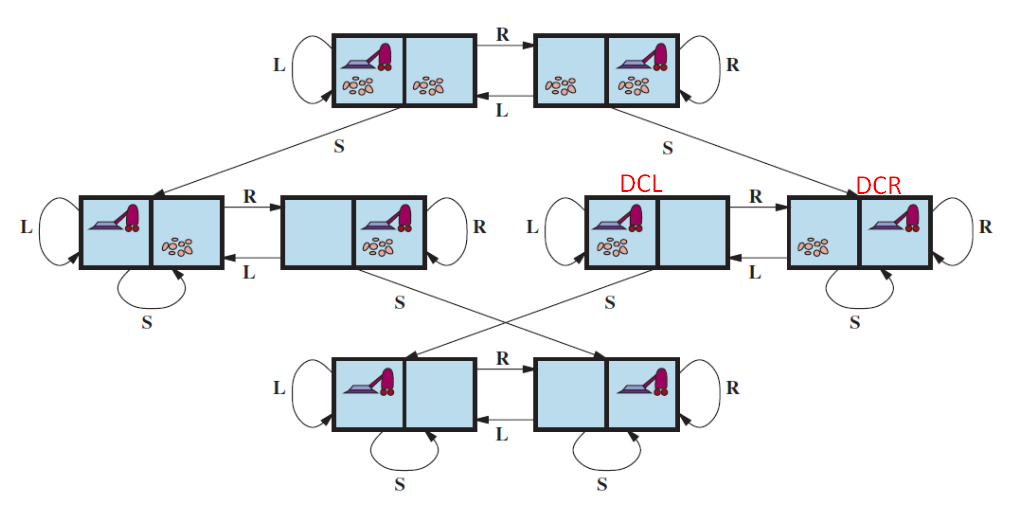

In [142]:
print(vp1.result("DCR", 'Suck'),vp1.result("DCR", 'Left'),vp1.result("DCR", 'Right'))

DCR DCL DCR


In [143]:
cost=0
vp1.path_cost(cost, "DCR", 'Suck',"DCR")

1

Now we are ready to consider `VacuumProblemSolvingAgent` class

In [144]:
from src.vacuumProblemSolvingAgentClass import VacuumProblemSolvingAgent

In [145]:
print(initState, goalState)

DDL ['CCL', 'CCR']


In [146]:
vpsa1=VacuumProblemSolvingAgent(initState,vacuumWorldGraph,goalState)

In [147]:
vpsa1.state # our Agent at the initial state

'DDL'

In [148]:
vpsa1.formulate_problem(vpsa1.state,vpsa1.goal).actions("DCR")

['Suck', 'Left', 'Right']

With **BFS** we choose a node, n, with minimum value of some evaluation function, f(n).

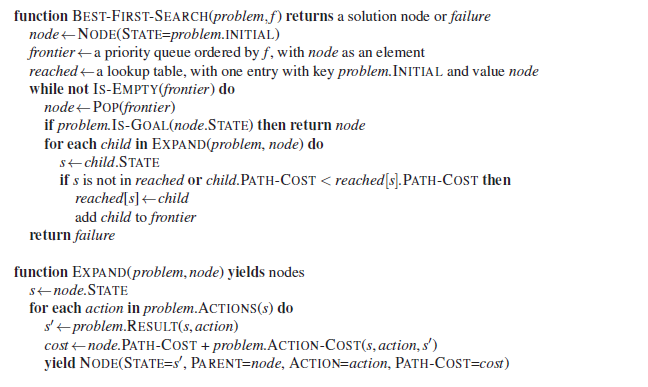

In [149]:
from src.PS_agentPrograms import BestFirstSearchAgentProgram

In [150]:
BFSAP1=BestFirstSearchAgentProgram()

In [151]:
vp1 # instance of vacuum Problem

In [152]:
vp1.initial

'DDL'

In [153]:
seq=BFSAP1(vp1)

<Node DDL>
<Node CDL>
<Node CDR>
<Node CCR>


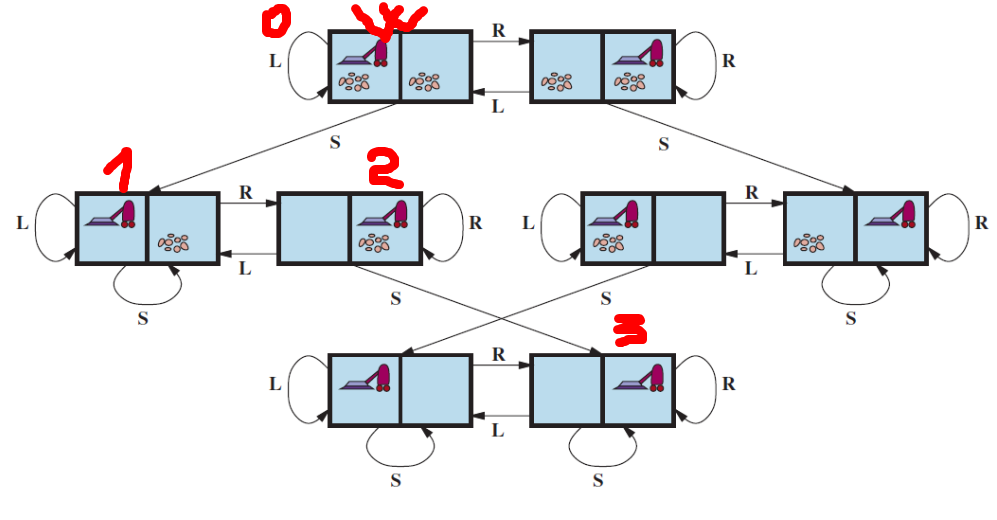

Now we can create the derived class `VacuumProblemSolvingAgentSMART` from VacuumProblemSolvingAgent to add AP and implement the Search.

!!! Explore the content of the `VacuumProblemSolvingAgentSMART class`

In [45]:
from src.agents import ProblemSolvingVacuumAgentBFS

In [169]:
BFSagent1=ProblemSolvingVacuumAgentBFS(initState,vacuumWorldGraph,goalState)

In [170]:
BFSagent1.seq # no solution at the very begining

[]

In [171]:
print(BFSagent1("CDR")) # the  __call__ method with the percept as a parameter

<Node CDR>
<Node CCR>
Solution (a sequence of actions) from the initial state to a goal: ['Suck']
Suck


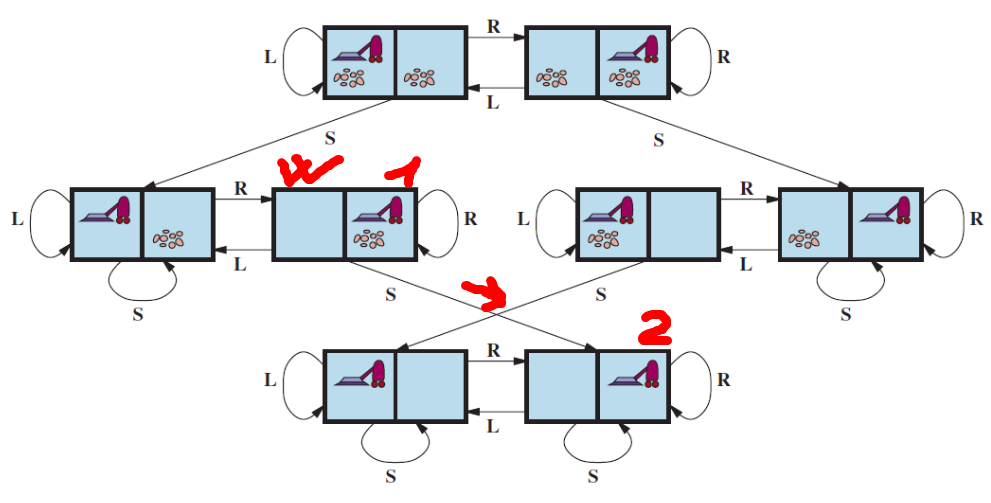

In [173]:
print(BFSagent1("DDL"))

<Node DDL>
<Node CDL>
<Node CDR>
<Node CCR>
Solution (a sequence of actions) from the initial state to a goal: ['Suck', 'Right', 'Suck']
Suck


#### SPS Agent for the Romania Navigation Problem

In [38]:
romaniaGraph.graph_dict

{'Arad': {'Zerind': 75, 'Sibiu': 140, 'Timisoara': 118},
 'Bucharest': {'Urziceni': 85, 'Pitesti': 101, 'Giurgiu': 90, 'Fagaras': 211},
 'Craiova': {'Drobeta': 120, 'Rimnicu': 146, 'Pitesti': 138},
 'Drobeta': {'Mehadia': 75, 'Craiova': 120},
 'Eforie': {'Hirsova': 86},
 'Fagaras': {'Sibiu': 99, 'Bucharest': 211},
 'Hirsova': {'Urziceni': 98, 'Eforie': 86},
 'Iasi': {'Vaslui': 92, 'Neamt': 87},
 'Lugoj': {'Timisoara': 111, 'Mehadia': 70},
 'Oradea': {'Zerind': 71, 'Sibiu': 151},
 'Pitesti': {'Rimnicu': 97, 'Bucharest': 101, 'Craiova': 138},
 'Rimnicu': {'Sibiu': 80, 'Craiova': 146, 'Pitesti': 97},
 'Urziceni': {'Vaslui': 142, 'Bucharest': 85, 'Hirsova': 98},
 'Zerind': {'Arad': 75, 'Oradea': 71},
 'Sibiu': {'Arad': 140, 'Fagaras': 99, 'Oradea': 151, 'Rimnicu': 80},
 'Timisoara': {'Arad': 118, 'Lugoj': 111},
 'Giurgiu': {'Bucharest': 90},
 'Mehadia': {'Drobeta': 75, 'Lugoj': 70},
 'Vaslui': {'Iasi': 92, 'Urziceni': 142},
 'Neamt': {'Iasi': 87}}

In [39]:
initState="Arad"
goalState="Bucharest"

In [40]:
rnp1=GraphProblem(initState,goalState,romaniaGraph)

In [ ]:
rnp1.actions(initState) #action = move to the city .....

['Zerind', 'Sibiu', 'Timisoara']

In [ ]:
rnp1.result(initState,"Zerind") # if from Arad we are moving to Zerind -> we will be there

'Zerind'

Now we need to create the `navProblemSolvingAgent class` with its own *formulate_problem* method (to override it for the Graph Problem instance).

Also we will add the `run()` method for the whole process (with ability to process multiple goals).

!!! Explore the `navProblemSolvingAgent class`

In [49]:
from src.agents import ProblemSolvingNavAgentBFS

In [50]:
BFSnavAgent1=ProblemSolvingNavAgentBFS(initState,romaniaGraph,goalState)

In [52]:
BFSnavAgent1.state

'Arad'

In [53]:
BFSnavAgent1.formulate_goal(BFSnavAgent1.state)

'Bucharest'

In [54]:
print("The 1st step to reach the goal is: ",BFSnavAgent1('Sibiu'))

<Node Sibiu>
<Node Arad>
<Node Fagaras>
<Node Bucharest>
Solution (a sequence of actions) from the initial state to a goal: ['Fagaras', 'Bucharest']
The 1st step to reach the goal is:  Fagaras


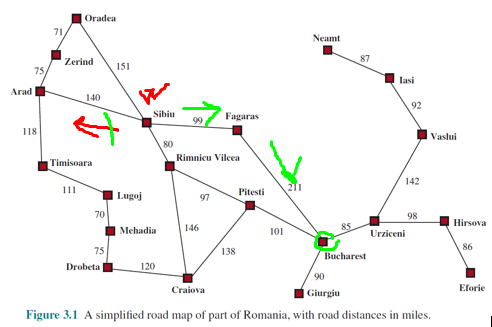

In [66]:
BFSnavAgent2=ProblemSolvingNavAgentBFS(initState,romaniaGraph,goalState)

In [67]:
BFSnavAgent2.run()

goal list: Bucharest
I have the only goal = Bucharest
<Node Arad>
<Node Sibiu>
<Node Fagaras>
<Node Bucharest>
Solution (a sequence of actions) from the initial state to a goal: ['Sibiu', 'Fagaras', 'Bucharest']


'Sibiu'

## Task1: The wolf, the goat and the cabbage puzzle

A farmer with his wolf 🐺, goat, 🐐 and cabbage come to the edge of a river they wish to cross. There is a boat at the river's edge, but, of course, only the farmer can row. The boat also can carry only two things (including the rower) at a time. If the wolf is ever left alone with the goat, the wolf will eat the goat; similarly, if the goat is left alone with the cabbage, the goat will eat the cabbage.

1. Design the complete state space representation
2. Visualize the state space with PyVis
3. Design and implement the Agent to find a sequence of crossings of the river so that all 4 characters arrive safely on the other side of the river.


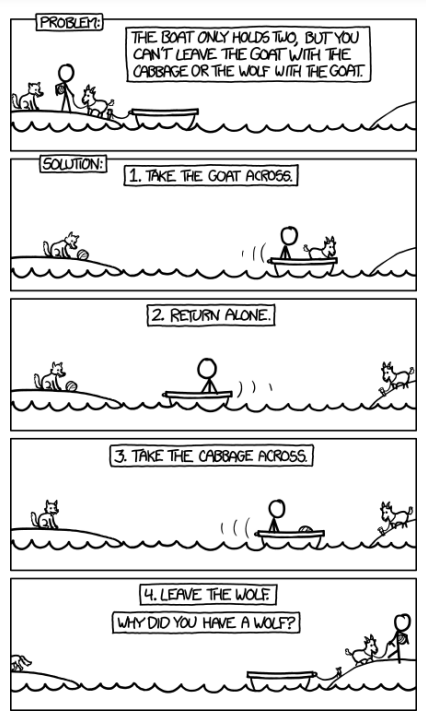

**Version 1.0**

States:
* Location of a wolf, a goat, a cabbage (left bank, boat, right bank) and a farmer with a boat (left, right)

Initial state:
* (left, left, left, left)

Actions:
1. Boat left, boat right
2. Load wolf, unload wolf
3. Load goat, unload goat
4. Load cabbage, unload cabbage


!!! never leaving wolf with goat, goat with cabbage alone)

* Goal:(right, right, right, right)
* Cost: 1 per action

**Version 1.01**

--//--

* Cost: 1 for action (1), 2 for action (4), 3 for actions (2,3)

## Task 2. Treasure Maze

1. Model a Maze Problem by having a node for a starting point, a finishing point, dead ends, and all the points in the maze where more than one path can be taken (or the Agent should turn around), and then connecting the vertices according to the paths in the maze

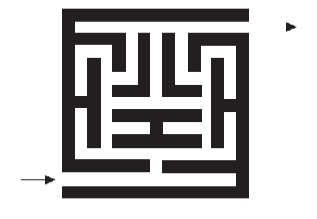

2. There are 4 kind of treasures in the Maze:
* pile of gold 😍 
* diamond 🔷
* flyer for 100 free pizzas 🍕
* 20 extra point for cs3220 final exam 🎉

Treasures are located randomly in the maze, but not at the starting or ending point. 

Also, 2 treasures cannot be located at the same point.

**!!! Visualize the Maze with all treasures as a graph with PyVis**

3. Initially the Agent's performace is 50% of the number of nodes. One executed action is -1 from performace

4. Agent's actions: advance, left, right

5. The agent must grab one treasure. 

Then redefine its goal to find the exit 🏠.

!!! Hint: the Treasure maze == an Environmnet